Gere uma sequência $U_1, U_2, \ldots, U_{1000}$ de variáveis aleatórias uniformes em um computador. Seja $S_n = \sum_{i=1}^{n} U_i$ para $n = 1, 2, \ldots, 1000$. Plote versus $n$ cada definição abaixo:

a. $S_n$

b. $\frac{S_n}{n}$


Gerando uma sequência de 1000 variáveis aleatórias uniformes independentes com valor mínimo 0 e valor máximo 1: 

$x_i \in [a, b] = [0, 1] \quad \forall U_i$


Estatísticas relacionadas à distribuição:

media = $1/2 (a + b)$

variancia = $1/12(b - a)^2$

Abaixo segue o código utilizado para gerar a distribuição descrita acima em python:

Nesse código, usamos o módulo numpy para gerar a sequência de variáveis aleatórias uniformes. A função arange(1, 1001) cria um array numpy com valores de 1 a 1000 para a variável n. Em seguida, usamos a função random.uniform(0, 1, 1000) para gerar a sequência de 1000 variáveis uniformes no intervalo [0, 1] e armazenamos na variável seq_uni.


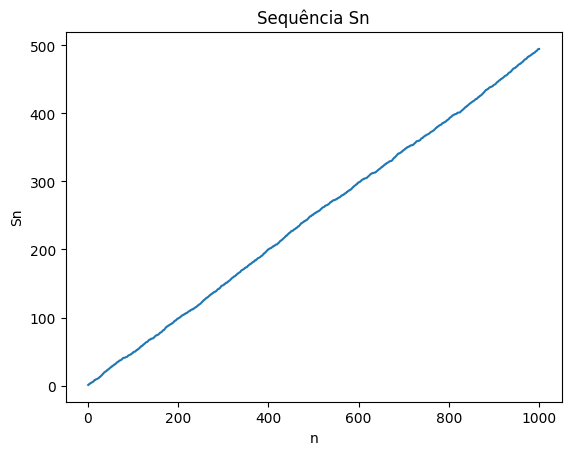

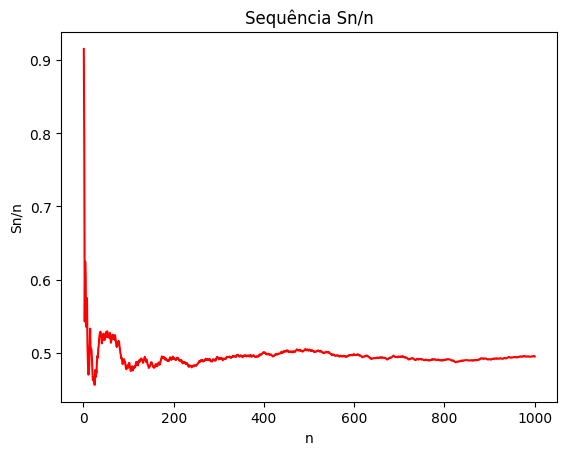

In [50]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1, 1001)
seq_uni = np.random.uniform(0, 1, 1000)

Sn = [sum(seq_uni[:i+1]) for i in range(1, 1001)]
Sn_1 = Sn/n

plt.plot(n, Sn)
plt.xlabel('n')
plt.ylabel('Sn')
plt.title('Sequência Sn')
plt.show()

plt.plot(n, Sn_1, color = "Red")
plt.xlabel('n')
plt.ylabel('Sn/n')
plt.title('Sequência Sn/n')
plt.show()

Repare acima que quando $n$ cresce, $\frac{S_n}{n}$ tende a $\frac{1}{2}$. Tal resultado é esperado pela lei dos grandes números, que nos diz que, dado uma sequência de variáveis aleatórias independentes com média $\mu$, temos que, para qualquer $\varepsilon > 0$,

\[
$P\left(\left|\sum_{i=1}^{n} x_i - \mu\right| > \varepsilon\right) \to 0 \quad \text{quando} \quad n \to \infty$.
\]


Gostaria de apresentar outra forma de fazer a simulação, mas dessa fez utilizando broadcasting do numpy, sem necessidade de usar loop for.
O broadcasting é uma funcionalidade do NumPy que permite que arrays de diferentes formas sejam usados em operações aritméticas, mesmo que suas formas não sejam compatíveis. Durante uma operação de broadcasting, o NumPy realiza automaticamente uma expansão dos arrays para que possam ter formas compatíveis e a operação possa ser executada elemento por elemento.

np.random.uniform(size=1000): Gera uma sequência de 1000 números aleatórios no intervalo [0, 1). Esses números são gerados de forma uniforme, ou seja, têm igual probabilidade de ocorrer em qualquer ponto dentro do intervalo.

np.cumsum(): Calcula a soma cumulativa da sequência gerada. A função cumsum é da biblioteca NumPy e retorna um novo array com os valores acumulados da sequência. Cada elemento do novo array é a soma dos elementos anteriores e o elemento atual da sequência original.

Text(0.5, 1.0, '$S_n/n$')

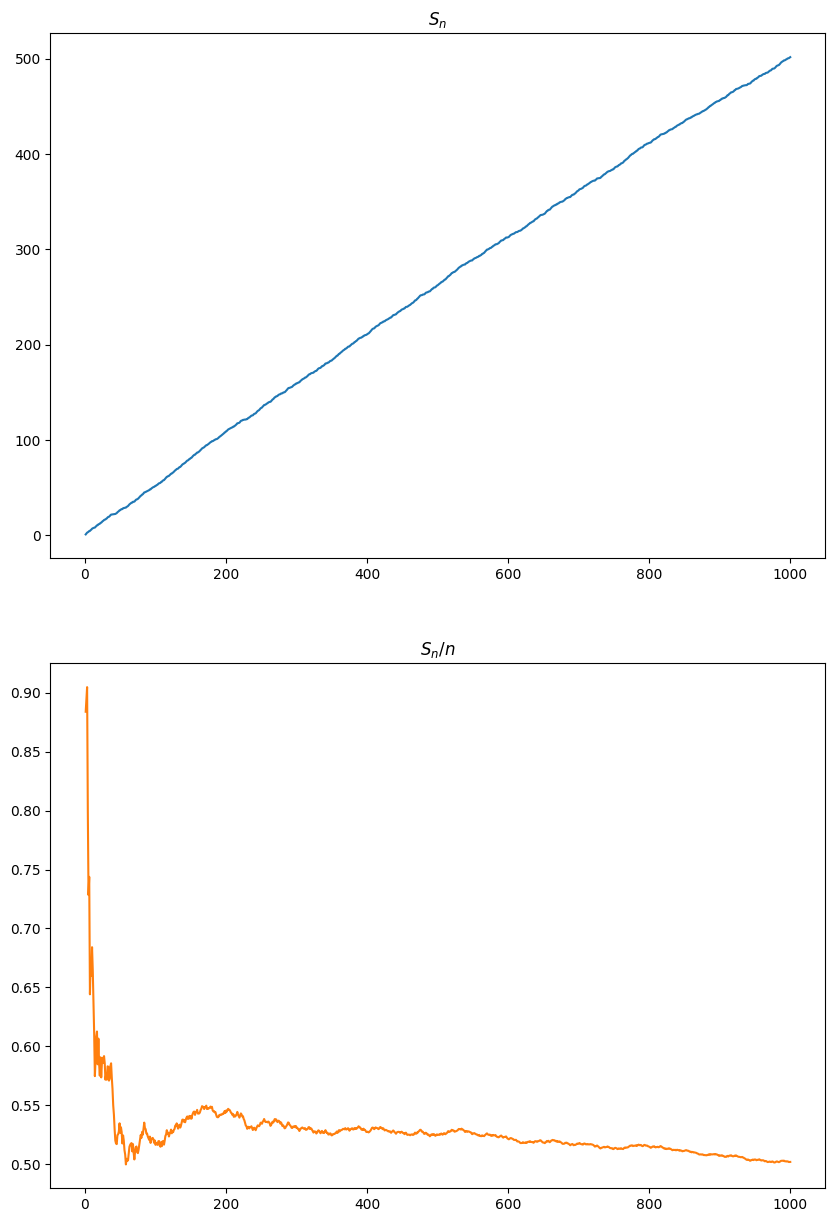

In [51]:
Sn = np.cumsum(np.random.uniform(size = 1000))
n = np.arange(1,1001)
fig, axs = plt.subplots(2, 1, figsize=(10,15))
axs[0].plot(n, Sn)
axs[0].set_title('$S_n$')
axs[1].plot(n, Sn/n, 'tab:orange')
axs[1].set_title('$S_n/n$')

Calculando o tempo para comparar eficiência broadcasting com o padrão do loop:



In [52]:
%%timeit
# Usando broadcasting
Sn = np.cumsum(np.random.uniform(size = 1000))
n = np.arange(1,1001)


12.9 µs ± 95.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [53]:
%%timeit
# Usando loops

n = np.arange(1, 1001)
seq_uni = np.random.uniform(0, 1, 1000)

Sn = [sum(seq_uni[:i+1]) for i in range(1, 1001)]


29.9 ms ± 352 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Uma diferença na ordem de milissegundos para microsegundos, 1000x mais rápido!